In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Load the dataset
df = pd.read_csv('../iriss.csv')


In [22]:

# Prepare features (X) and target (y)
X = df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']].values
y = df['Species'].values

In [23]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify that the lengths of X_train and y_train match
print("X_train shape:", X_train.shape)
print("y_train length:", len(y_train))

X_train shape: (120, 4)
y_train length: 120


In [25]:
# Fit the KNN model
knn = KNeighborsClassifier(6)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)



In [26]:
y_pred.shape

(30,)

In [27]:
print('Prediction: {}'.format(y_pred))

Prediction: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [30]:
print(knn.score(X_train,y_train))

0.9666666666666667


In [8]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [31]:
train_accuracy = {}
test_accuracy = {}

In [33]:
neighbors = np.arange(1,11)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    train_accuracy[neighbor] = knn.score(X_train,y_train)

    test_accuracy[neighbor] = knn.score(X_test,y_test)

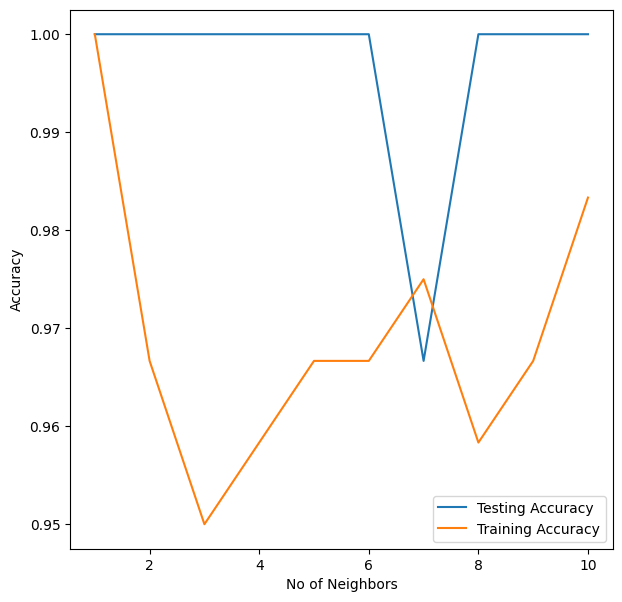

In [35]:
plt.figure(figsize=(7,7))
plt.plot(neighbors,test_accuracy.values(), label= "Testing Accuracy")
plt.plot(neighbors,train_accuracy.values(), label= "Training Accuracy")
plt.legend()
plt.xlabel("No of Neighbors")
plt.ylabel("Accuracy")
plt.show()